In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号 
from scipy.optimize import curve_fit

# 定义非线性模型
def my_model(x, k, b):
    return k*x + b 

In [3]:
from math import log,floor

def string_result(x,dx,latex=False):
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    duobao=0
    if (value_dx<2):
        duobao=1
    
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    delord+=duobao
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if order_x!=0:
        if latex:
            return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
        else:
            return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')
    else:
        if latex:
            return(f'${value_x_show}\\pm{value_dx_show}$')
        else:
            return(f'{value_x_show} ± {value_dx_show}')

In [4]:
def intersection_point(m1, b1, m2, b2):
    # 计算交点的 x 坐标
    x = (b2 - b1) / (m1 - m2)
    
    # 使用其中一条直线的方程计算对应的 y 坐标
    y = m1 * x + b1
    
    return x, y

# 示例
m1 = 2
b1 = 1
m2 = -1
b2 = 3

x_intersect, y_intersect = intersection_point(m1, b1, m2, b2)

print(f"交点坐标: ({x_intersect}, {y_intersect})")


交点坐标: (0.6666666666666666, 2.333333333333333)


In [5]:
import os
os.makedirs('output', exist_ok=True)

# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

myfile_list= []

for file_name in sorted_file_list:
    if file_name[-3:]=='csv':
        myfile_list.append(file_name)

for i in myfile_list:
    print(i)

20000101_034428.csv
20000101_034702.csv
20000101_034920.csv
20000101_035117.csv
20000101_035320.csv
20000101_035550.csv
20000101_035840.csv


数据来自20000101_034428.csv



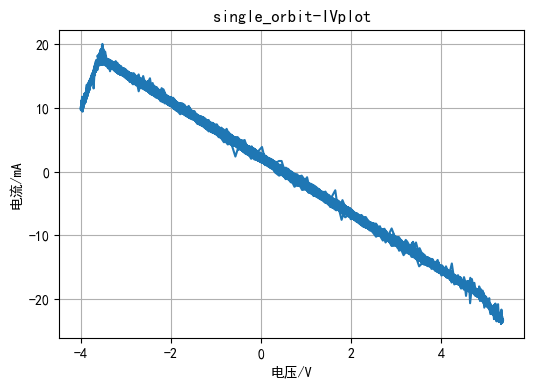

数据来自20000101_034702.csv



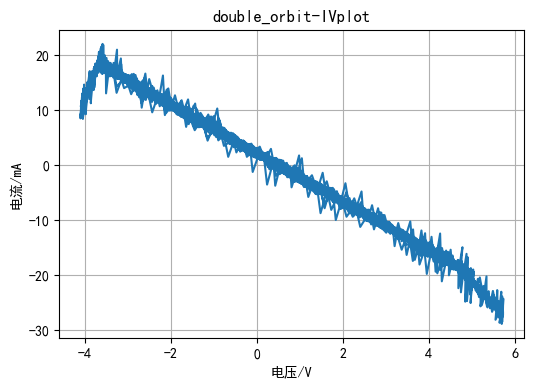

数据来自20000101_034920.csv



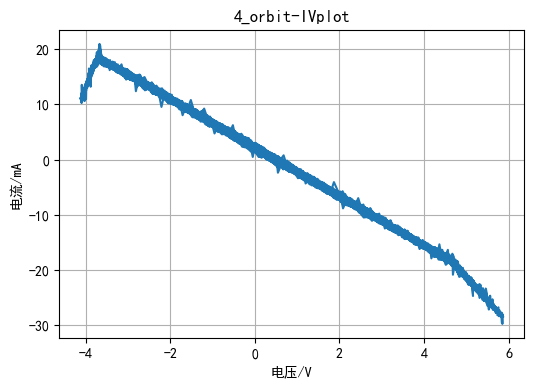

数据来自20000101_035117.csv



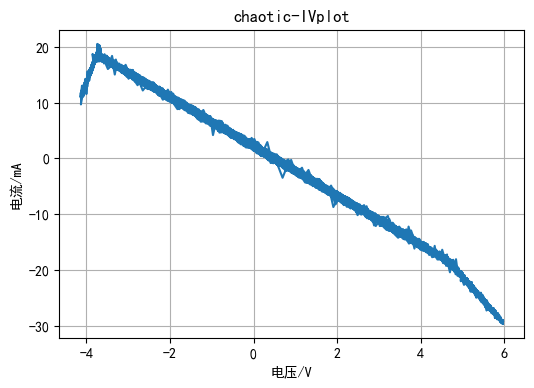

数据来自20000101_035320.csv



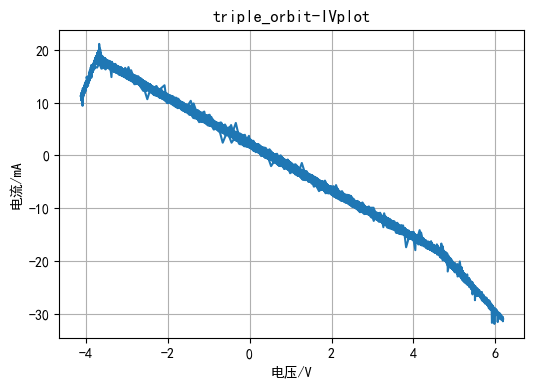

数据来自20000101_035550.csv



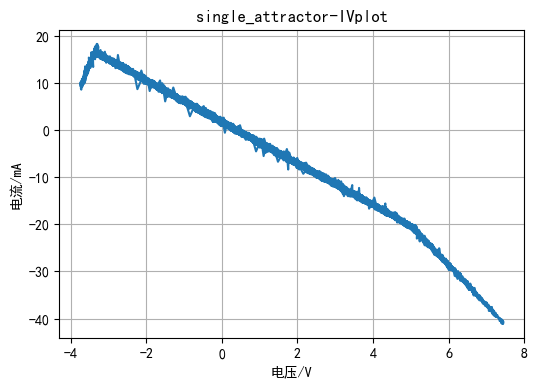

数据来自20000101_035840.csv



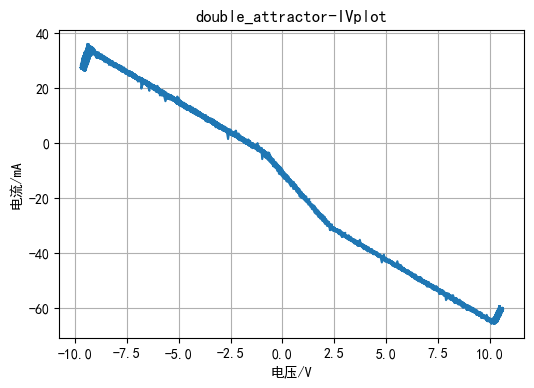

In [6]:
title = ['single_orbit', 'double_orbit', '4_orbit','chaotic','triple_orbit','single_attractor','double_attractor']

for j in range(7):
    file=myfile_list[j]

    print(f"数据来自{file}")
    print()
    df = pd.read_csv(file)
    ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
    ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

    V_data=ch1_data
    I_data=ch2_data*100
    plt.figure(figsize=(6, 4))

    # 绘制CH1的数据
    plt.plot(V_data, I_data)
    plt.xlabel('电压/V')
    plt.ylabel('电流/mA')
    plt.title(f'{title[j]}-IVplot')

    
    plt.grid()
    plt.savefig(f'output/{j+1}_{title[j]}_NR.pdf', bbox_inches='tight')
    plt.show()
    # plt.title(f"${Hzdata[j]}\\mathrm{{Hz}}$ I-V特性曲线")




数据来自20000101_034428.csv



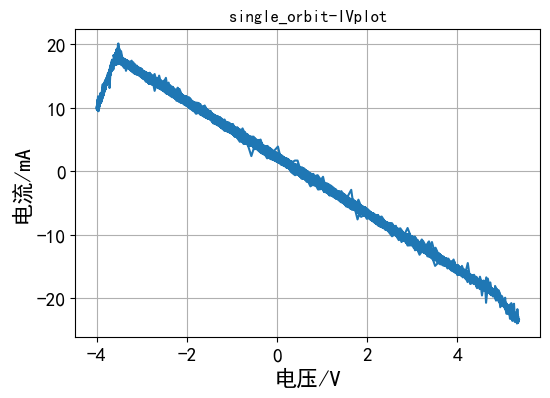

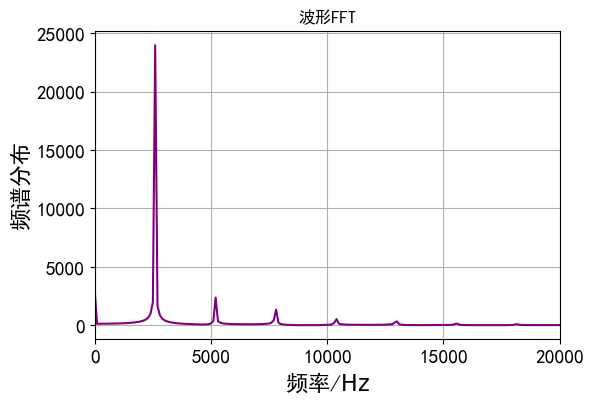

数据来自20000101_034702.csv



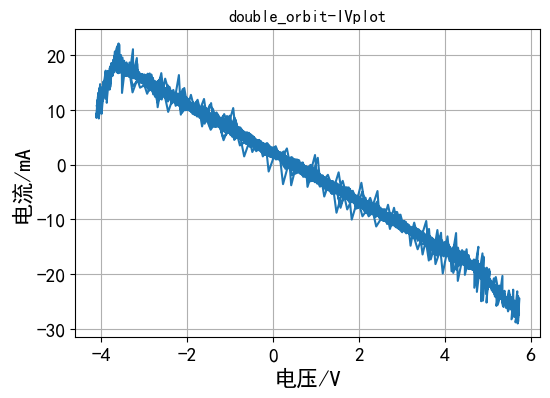

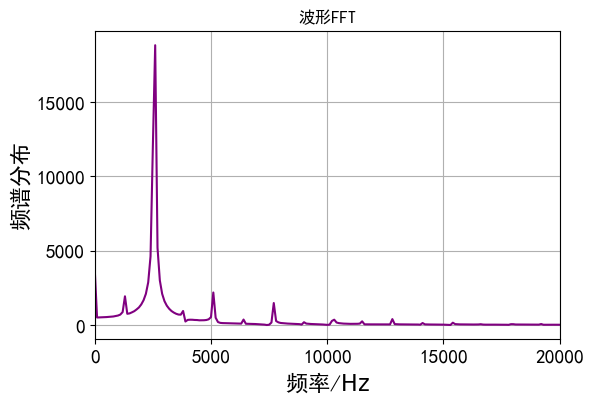

数据来自20000101_034920.csv



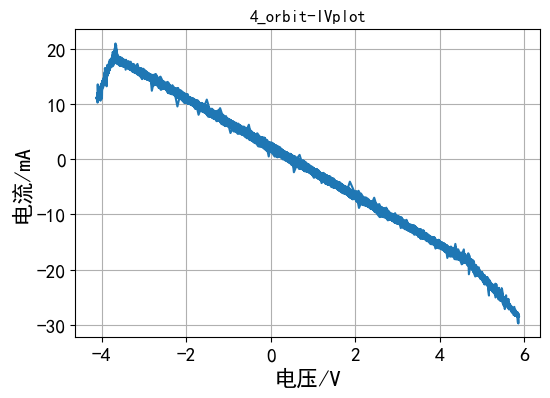

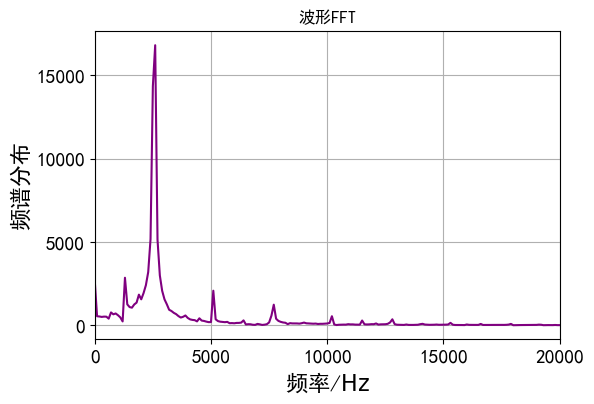

数据来自20000101_035117.csv



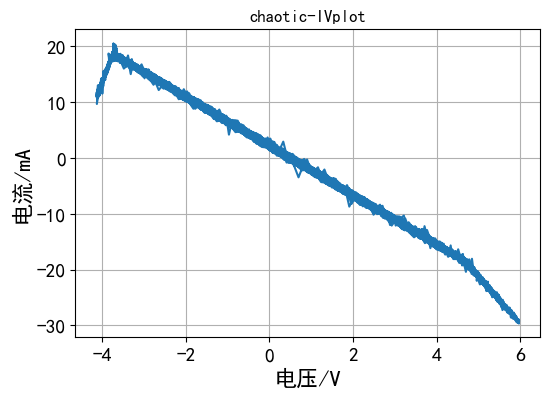

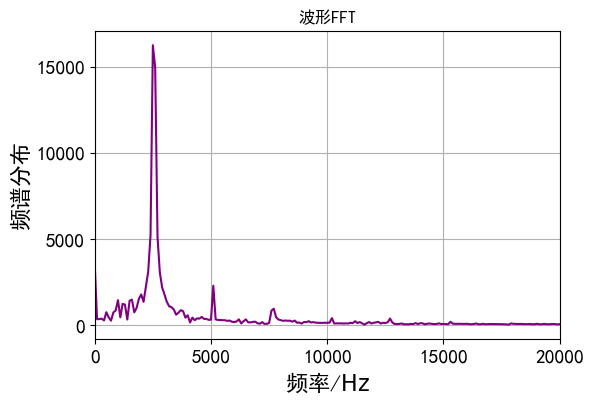

数据来自20000101_035320.csv



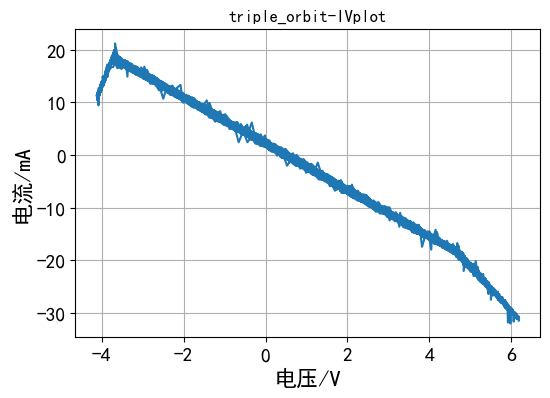

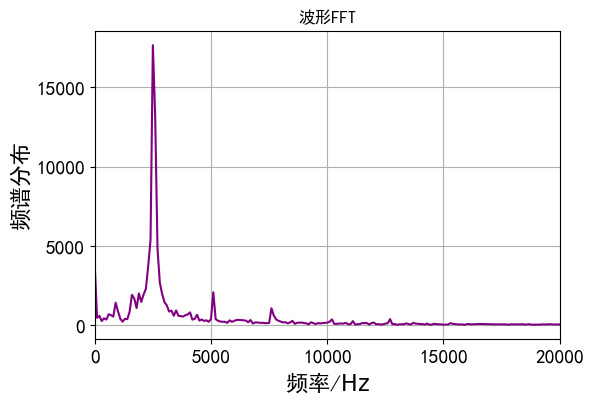

数据来自20000101_035550.csv



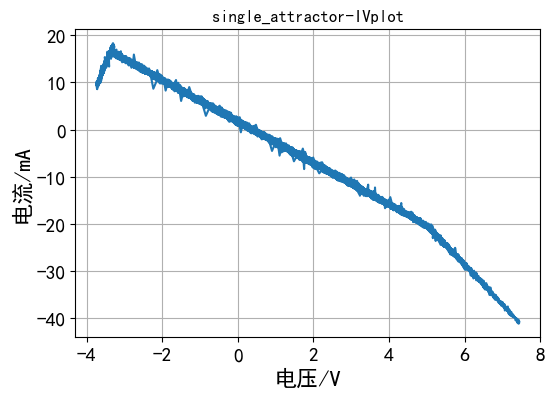

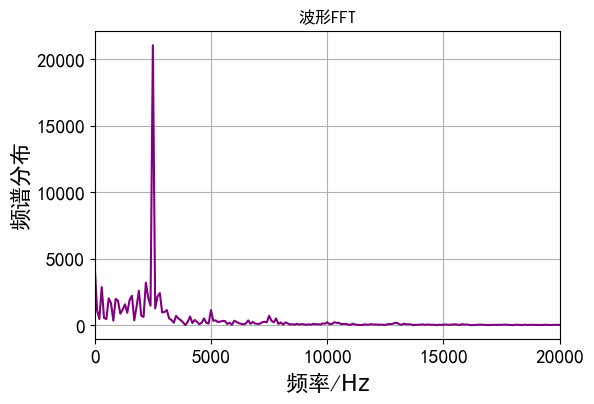

数据来自20000101_035840.csv



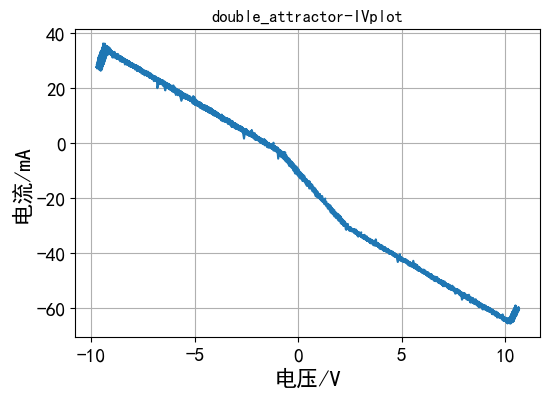

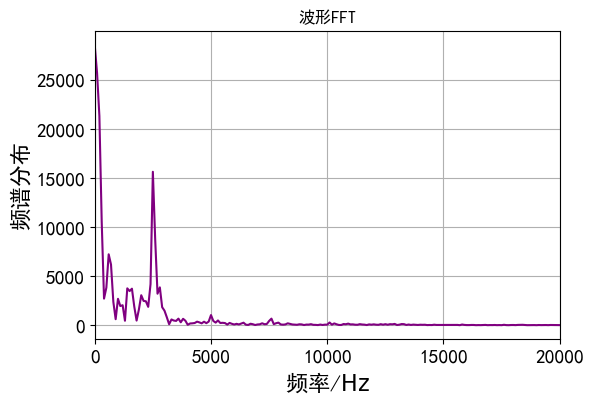

In [29]:
title = ['single_orbit', 'double_orbit', '4_orbit','chaotic','triple_orbit','single_attractor','double_attractor']

for j in range(7):
    file=myfile_list[j]

    print(f"数据来自{file}")
    print()
    df = pd.read_csv(file)
    x_data = df.iloc[10:, 0].to_numpy(dtype=int)
    ch1_data = df.iloc[10:, 1].to_numpy(dtype=float)*1e-3#单位变为V
    ch2_data = df.iloc[10:, 2].to_numpy(dtype=float)*1e-3#单位变为V

    time_dict = {'S': 1, 'mS': 1e-3, 'uS': 1e-6 ,'nS':1e-9}

    time_interval=float(df.iloc[7, 1][:-2])*time_dict[df.iloc[7, 1][-2:]]
    time_data=x_data*time_interval

    V_data=ch1_data
    I_data=ch2_data*100
    plt.figure(figsize=(6, 4))

    # 绘制CH1的数据
    plt.plot(V_data,I_data)
    plt.xlabel('电压/V')
    plt.ylabel('电流/mA')
    plt.title(f'{title[j]}-IVplot')

    
    plt.grid()
    plt.savefig(f'output/{j+1}_{title[j]}_NR.pdf', bbox_inches='tight')
    plt.show()
    # plt.title(f"${Hzdata[j]}\\mathrm{{Hz}}$ I-V特性曲线")


    n=len(time_data)
    # 计算FFT
    fft_result = np.fft.fft(V_data)
    fft_freqs = np.arange(n)/(n*time_interval) # FFT频率轴
    plt.figure(figsize=(6, 4))
    plt.plot(fft_freqs, np.abs(fft_result),color='purple')
    plt.xlim(0,20000)
    plt.xlabel('频率/$\\mathrm{{Hz}}$')
    plt.ylabel('频谱分布')
    plt.title('波形FFT')

    plt.grid()
    plt.savefig(f'output/{j+1}_{title[j]}_VdataFFT.pdf', bbox_inches='tight')
    plt.show()




# 以下为参考代码

第0个参数的结果为:$( 2.09\pm0.08 )\times 10^1$
第1个参数的结果为:$( -3.1\pm0.4 )\times 10^1$
决定系数R^2为:0.9393268942239573


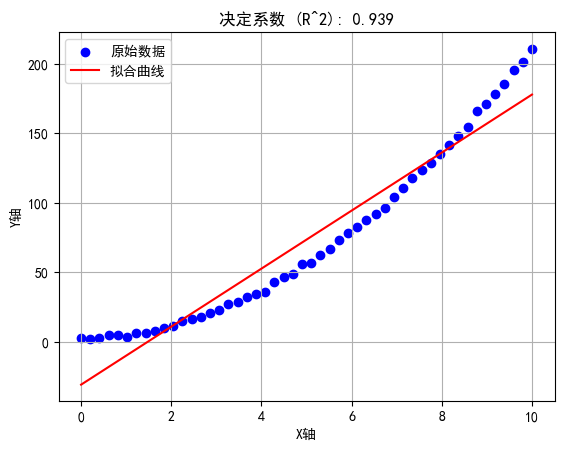

(array([ 20.85883774, -30.80669059]),
 array([0.76517227, 4.44020639]),
 0.9393268942239573)

In [8]:
# 定义非线性模型
def my_model(x, k, b):
    return k*x + b 

# 创建模拟数据
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = 2 * x_data**2 + 1 * x_data + 1 + np.random.normal(0, 1, 50)

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data)
std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.scatter(x_data, y_data, label='原始数据', color='b')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
# linspace_ydata=my_model(linspace_xdata,*params)


linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)



plt.plot(linspace_xdata, linspace_ydata, label='拟合曲线', color='r')
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.3f}")
plt.show()


params,std,r_squared



In [9]:
# import tikzplotlib

my_dict = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,title='Waveforms on the oscilloscope',label1='CH1',label2='CH2',x_label='时间',y_label='电压/V',yrange=((),()),time_unit='s',save=''):
    if time_unit=='us':
        time_unit='μs'
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit]

    # 创建两个子图
    plt.figure(figsize=(8,4))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()
    plt.xlabel(x_label+'/'+time_unit)


    # 设置标题
    plt.suptitle(title)#,fontsize=10)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename,choice=1, title='Waveform on the oscilloscope', label='CH1', x_label='Time', y_label='Voltage (V)', yrange=(), time_unit='s', save=''):
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit]

    # 创建一个图形
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{time_unit}')
    plt.ylabel(y_label)
    plt.title(title)

    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend()

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()

    return x_data, ch1_data, time_unit